In [46]:
import tensorflow as tf
from tensorflow.python import keras
from keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.python.keras.layers import Dense

In [20]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [21]:
X_test.shape

(10000, 32, 32, 3)

In [22]:
y_train.shape

(50000, 1)

In [24]:
y_train[:5]    ##Checking the first five samples

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
## We dont need a two dimensional array for y_train so we will reshape it


In [25]:
y_train = y_train.reshape(-1,)    ## we use -1 when we dont want to change the first dimension


In [26]:
y_test= y_test.reshape(-1,)

In [13]:
classes= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
classes[9]

'truck'

In [15]:
def plot_sample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
  

## we will have to divide each pixel value by 255, because rgb value is 255, so when we divide by 255 we will be normalising in 0 to 1 range

In [16]:
X_train = X_train[0]/255
X_test= X_test[0]/255

In [27]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 102s 65ms/step - loss: nan - accuracy: 0.1001
Epoch 2/5
1563/1563 [==============================] - 101s 65ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 101s 64ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 101s 64ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 101s 64ms/step - loss: nan - accuracy: 0.1000


In [29]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [49]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 39ms/step - loss: 1.8591 - accuracy: 0.4001
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2575 - accuracy: 0.5591
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0893 - accuracy: 0.6216
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9873 - accuracy: 0.6589
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9110 - accuracy: 0.6845
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8409 - accuracy: 0.7076
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7752 - accuracy: 0.7319
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7256 - accuracy: 0.7479
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6782 - accuracy: 0.7649
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [51]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5980 - accuracy: 0.7950
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.5680 - accuracy: 0.8035
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5351 - accuracy: 0.8132
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5037 - accuracy: 0.8274
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.4854 - accuracy: 0.8305
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.4666 - accuracy: 0.8393
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.4481 - accuracy: 0.8441
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.4197 - accuracy: 0.8529
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.4152 - accuracy: 0.8565
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [52]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.7980 - accuracy: 0.6335


[1.798007607460022, 0.6334999799728394]

In [53]:
y_test=y_test.reshape(-1,)
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

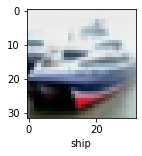

In [54]:
plot_sample(X_test,y_test,1)

In [55]:
y_pred=cnn.predict(X_test)
y_pred[:5]
##this will show the prediction of all the elements


array([[3.1013984e-05, 5.9981459e-05, 3.8582322e-05, 8.0757695e-01,
        2.3503653e-06, 6.2760478e-03, 9.9682788e-05, 2.2187068e-07,
        1.8591407e-01, 1.0671081e-06],
       [8.6302245e-03, 2.4610968e-01, 6.2529772e-08, 1.7286697e-08,
        1.6761559e-11, 3.8232716e-12, 8.1268161e-12, 2.7697891e-14,
        7.4312168e-01, 2.1383541e-03],
       [7.3057666e-02, 4.1214174e-01, 1.4435423e-03, 4.2068609e-03,
        2.2114658e-04, 2.4370640e-04, 6.1373830e-05, 1.0965920e-04,
        4.3428981e-01, 7.4224561e-02],
       [6.2461025e-01, 1.3760270e-03, 7.3344761e-04, 1.4453456e-02,
        5.8567207e-03, 9.1850205e-04, 8.6095970e-04, 6.4179741e-02,
        1.6744514e-01, 1.1956578e-01],
       [1.0398979e-13, 4.0474215e-09, 3.3451268e-03, 7.6840824e-04,
        8.6170697e-01, 5.7379527e-08, 1.3417941e-01, 2.0703370e-10,
        1.8978197e-10, 8.1770649e-12]], dtype=float32)

In [57]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [58]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

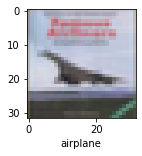

In [62]:
plot_sample(X_test, y_test,3)

In [64]:
classes[y_classes[4]]

'deer'

In [65]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
